In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow
import matplotlib.ticker as ntick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_data=pd.read_csv('customer_churn_large_dataset.csv')

In [3]:
base_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
base_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
base_data.shape

(100000, 9)

In [6]:
base_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [7]:
base_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [8]:
base_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Text(0.5, 1.02, 'count of TARGET Variable per category')

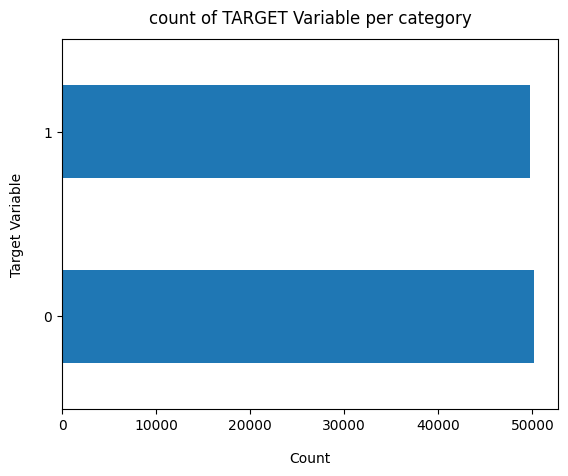

In [9]:
base_data['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("count of TARGET Variable per category", y=1.02)

In [10]:
100*base_data['Churn'].value_counts()/len(base_data['Churn'])

Churn
0    50.221
1    49.779
Name: count, dtype: float64

In [11]:
base_data['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

In [12]:
base_data[base_data.Churn==0]

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
...,...,...,...,...,...,...,...,...,...
99988,99989,Customer_99989,52,Male,Chicago,3,33.33,81,0
99990,99991,Customer_99991,62,Male,Chicago,9,36.34,432,0
99992,99993,Customer_99993,44,Male,New York,18,45.87,229,0
99994,99995,Customer_99995,47,Female,Houston,8,34.58,200,0


In [13]:
base_data[base_data.Churn==1]

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
5,6,Customer_6,67,Male,New York,15,82.65,456,1
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1
...,...,...,...,...,...,...,...,...,...
99993,99994,Customer_99994,20,Female,Houston,15,84.72,312,1
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [14]:
base_data_0=base_data[base_data.Churn==0].Monthly_Bill

In [15]:
base_data_0.head()

0    73.36
1    48.76
2    85.47
4    58.14
6    73.79
Name: Monthly_Bill, dtype: float64

In [16]:
base_data_1=base_data[base_data.Churn==1].Age

In [17]:
base_data_1.head()

3    36
5    67
7    67
8    20
9    53
Name: Age, dtype: int64

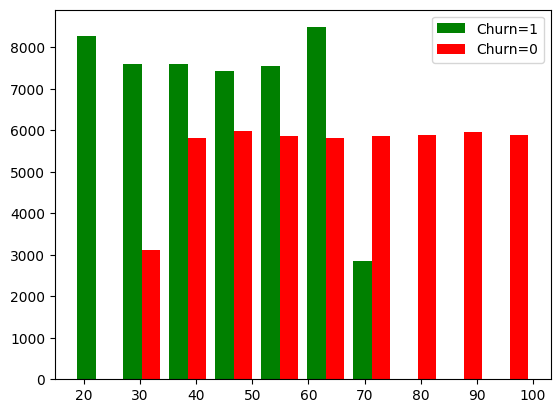

In [18]:
plt.hist([base_data_1, base_data_0], color=['green','red'],label=['Churn=1','Churn=0'])
plt.legend()

(array([[4967., 5006., 4945., 4998., 5015., 4936., 4849., 4982., 4951.,
         5130.],
        [4926., 4979., 5178., 4991., 4984., 5023., 5027., 4981., 5118.,
         5014.]]),
 array([ 30.,  37.,  44.,  51.,  58.,  65.,  72.,  79.,  86.,  93., 100.]),
 <a list of 2 BarContainer objects>)

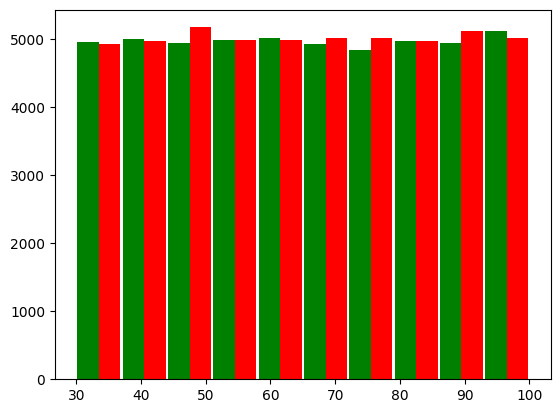

In [19]:
mb_Churn_0=base_data[base_data.Churn==0].Monthly_Bill
mb_Churn_1=base_data[base_data.Churn==1].Monthly_Bill

plt.hist([mb_Churn_1, mb_Churn_0], rwidth=0.95, color=['green','red'],label=['Churn=1','Churn=0'])

In [20]:
for column in base_data:
    print(column)

CustomerID
Name
Age
Gender
Location
Subscription_Length_Months
Monthly_Bill
Total_Usage_GB
Churn


In [21]:
for column in base_data:
    print(f'{column} : {base_data[column].unique()}')

CustomerID : [     1      2      3 ...  99998  99999 100000]
Name : ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Age : [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
Gender : ['Male' 'Female']
Location : ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
Subscription_Length_Months : [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]
Monthly_Bill : [73.36 48.76 85.47 ... 75.21 41.98 83.55]
Total_Usage_GB : [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 3

In [22]:
def print_unique_col_values(base_data):
    for column in base_data:
        if base_data[column].dtypes=='object':
            print(f'{column} : {base_data[column].unique()}')

In [23]:
print_unique_col_values(base_data)

Name : ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Gender : ['Male' 'Female']
Location : ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [24]:
base_data['Gender'].replace({'Female':1, 'Male':0},inplace=True)

In [25]:
base_data['Gender'].unique()

array([0, 1], dtype=int64)

In [26]:
pd.get_dummies(data=base_data,columns=['Location'])

,CustomerID,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,0,17,73.36,236,0,False,False,True,False,False
1,2,Customer_2,62,1,1,48.76,172,0,False,False,False,False,True
2,3,Customer_3,24,1,5,85.47,460,0,False,False,True,False,False
3,4,Customer_4,36,1,3,97.94,297,1,False,False,False,True,False
4,5,Customer_5,46,1,19,58.14,266,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,0,23,55.13,226,1,False,True,False,False,False
99996,99997,Customer_99997,62,1,19,61.65,351,0,False,False,False,False,True
99997,99998,Customer_99998,64,0,17,96.11,251,1,True,False,False,False,False
99998,99999,Customer_99999,51,1,20,49.25,434,1,False,False,False,False,True


In [27]:
cols_to_scale = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

base_data[cols_to_scale]=scaler.fit_transform(base_data[cols_to_scale])

In [28]:
for col in base_data:
    print(f'{col}:{base_data[col].unique()}')

CustomerID:[     1      2      3 ...  99998  99999 100000]
Name:['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Age:[63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
Gender:[0 1]
Location:['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
Subscription_Length_Months:[0.69565217 0.         0.17391304 0.08695652 0.7826087  0.60869565
 0.39130435 0.47826087 0.82608696 0.52173913 0.30434783 0.95652174
 0.04347826 0.13043478 0.73913043 0.34782609 0.56521739 0.65217391
 0.2173913  0.26086957 1.         0.91304348 0.43478261 0.86956522]
Monthly_Bill:[0.61942857 0.268      0.79242857 ... 0.64585714 0.17114286 0.765     ]
Total_Usage_GB:[0.41333333 0.27111111 0.91111111 0.54888889 0.48       0.90222222
 0.48666667 0.76888889 0.22222222 0.74       0.87111111 0.54444444
 0.21777778 0.42       0.40666667 0.40222222 0.32888889 0.675555

In [29]:
x=base_data.drop('Churn',axis='columns')
y=base_data['Churn']


In [30]:
x=x.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')

In [31]:
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
x_train.shape

(80000, 8)

In [34]:
x_test.shape

(20000, 8)

In [35]:
x_train[:10]

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
46628,46629,0.0,33,0,0.0,0.652174,0.100571,0.264444
92846,92847,0.0,41,0,0.0,0.304348,0.797429,0.075556
30440,30441,0.0,41,1,0.0,0.565217,0.681429,0.771111
79978,79979,0.0,22,0,0.0,0.478261,0.547000,0.288889
85038,85039,0.0,30,0,0.0,0.739130,0.817857,1.000000
48616,48617,0.0,56,0,0.0,0.043478,0.319429,0.813333
77987,77988,0.0,59,1,0.0,0.173913,0.669286,0.622222
61879,61880,0.0,39,0,0.0,0.130435,0.129429,0.784444
86215,86216,0.0,25,1,0.0,0.565217,0.574000,0.688889
38620,38621,0.0,64,0,0.0,0.173913,0.543571,0.946667


In [36]:
import sys
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(6, input_shape=(8,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
np.asarray(x_train).astype('float32')
model.fit(x_train, y_train, epochs=100)


Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 11.4876 - accuracy: 0.5017
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 6.6424 - accuracy: 0.4992
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 6.7269 - accuracy: 0.5010
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 7.0046 - accuracy: 0.4977
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 7.1744 - accuracy: 0.4967
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 6.9440 - accuracy: 0.4994
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 6.3588 - accuracy: 0.4985
Epoch 8/100
2500/2500 [==============================] - 5s 2ms/step - loss: 7.0876 - accuracy: 0.5007
Epoch 9/100
2500/2500 [==============================] - 5s 2ms/step - loss: 6.5636 - accuracy: 0.4995
Epoch 10/100
2500/2500 [==============================] - 5s 2ms/step - 

2500/2500 [==============================] - 5s 2ms/step - loss: 4.8141 - accuracy: 0.4994
Epoch 80/100
2500/2500 [==============================] - 6s 2ms/step - loss: 4.6550 - accuracy: 0.4994
Epoch 81/100
2500/2500 [==============================] - 4s 2ms/step - loss: 4.9989 - accuracy: 0.5005
Epoch 82/100
2500/2500 [==============================] - 5s 2ms/step - loss: 4.8009 - accuracy: 0.5047
Epoch 83/100
2500/2500 [==============================] - 4s 2ms/step - loss: 4.8151 - accuracy: 0.4999
Epoch 84/100
2500/2500 [==============================] - 4s 2ms/step - loss: 4.8700 - accuracy: 0.4971
Epoch 85/100
2500/2500 [==============================] - 4s 2ms/step - loss: 4.7266 - accuracy: 0.4996
Epoch 86/100
2500/2500 [==============================] - 5s 2ms/step - loss: 4.3602 - accuracy: 0.5007
Epoch 87/100
2500/2500 [==============================] - 5s 2ms/step - loss: 4.6064 - accuracy: 0.5024
Epoch 88/100
2500/2500 [==============================] - 5s 2ms/step - loss:

In [37]:
model.evaluate(x_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 7.0957 - accuracy: 0.4974


[7.095693588256836, 0.49744999408721924]

In [38]:
yp=model.predict(x_test)
yp[:5]

625/625 [==============================] - 1s 1ms/step


array([[3.1033565e-08],
       [6.2499697e-05],
       [3.2543625e-07],
       [3.6956232e-02],
       [6.8087615e-02]], dtype=float32)

In [39]:
y_test[:10]

60743    1
33949    1
52805    1
11804    1
9229     1
49950    1
24988    0
90271    0
33532    0
88299    0
Name: Churn, dtype: int64

In [49]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
#y_pred=[:10]

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      9950
           1       0.49      0.00      0.00     10050

    accuracy                           0.50     20000
   macro avg       0.49      0.50      0.33     20000
weighted avg       0.49      0.50      0.33     20000



Text(95.72222222222221, 0.5, 'Truth')

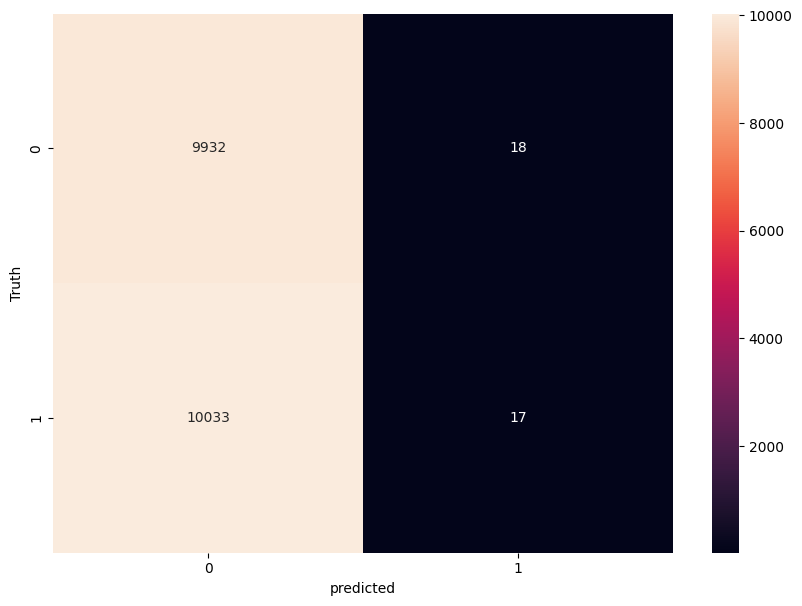

In [52]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')